In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Load data

In [2]:
master_df = pd.read_pickle("master_df.pkl")
master_df

,Date,Adj Close,Close,High,Low,Open,Volume,ETF
5,2007-11-14,382.000000,382.000000,397.000000,364.200012,380.000000,37765.0,ANTE
6,2007-11-15,370.000000,370.000000,381.600006,370.000000,376.000000,19380.0,ANTE
8,2007-11-19,363.399994,363.399994,365.399994,345.600006,355.399994,21095.0,ANTE
9,2007-11-20,345.000000,345.000000,359.399994,327.000000,328.200012,36280.0,ANTE
11,2007-11-23,331.200012,331.200012,368.399994,314.600006,325.000000,39690.0,ANTE
...,...,...,...,...,...,...,...,...
18387217,2025-01-30,50.630001,50.630001,52.270000,48.650002,50.029999,4578200.0,NXT
18387218,2025-01-31,50.419998,50.419998,52.139999,50.395000,51.130001,2389700.0,NXT
18387219,2025-02-03,48.599998,48.599998,49.430000,47.750000,48.320000,2570700.0,NXT
18387220,2025-02-04,49.750000,49.750000,50.340000,47.660000,48.820000,2268300.0,NXT


In [4]:
etf_key = "QQQM"
df_sample = master_df[master_df["ETF"] == etf_key]

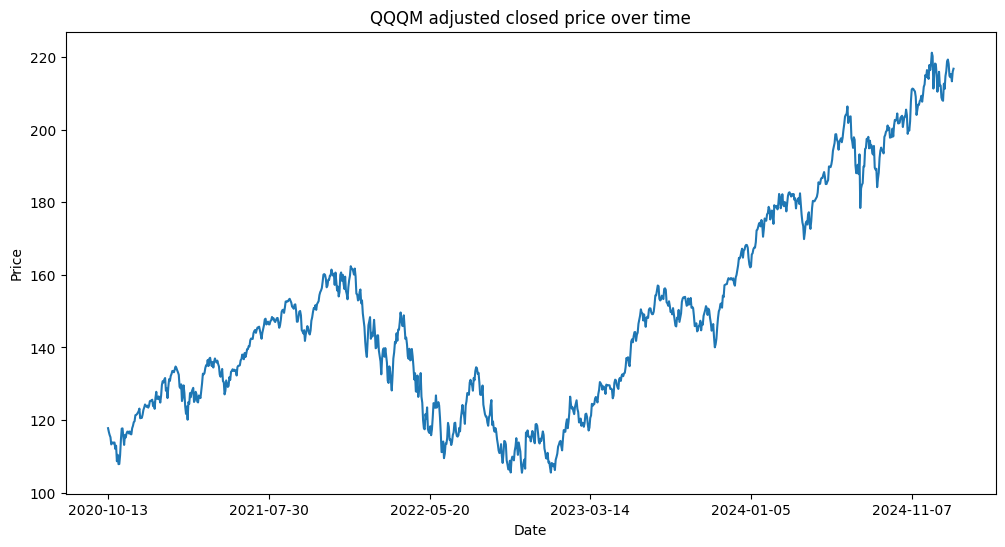

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df_sample["Date"], df_sample["Adj Close"], label="Adjusted close")
plt.title(f"{etf_key} adjusted closed price over time")
plt.xlabel("Date")
plt.ylabel("Price")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(7))
plt.show()

# QQQM moving average 

In [6]:
pricesMA = master_df.sort_values(["Date", "ETF"]).set_index("Date")[["ETF", "Adj Close", "Volume"]]

In [18]:
# For each ETF calculate the 20 & 200 day moving average price
for w, label in [(20, "SMA_short"), (200, "SMA_long")]:
    pricesMA[label] = (pricesMA.groupby("ETF")["Adj Close"].transform(lambda s: s.rolling(w).mean()))
pricesMA

,ETF,Adj Close,Volume,SMA_short,SMA_long,BullishFlip,BearishFlip,volMa,busyDay,price_fwd_63,ret_fwd_63
Date,,,,,,,,,,,
1999-11-22,A,26.511736,6577870.0,NaN,NaN,False,False,1065.0,True,64.321091,1.426137
1999-11-23,A,24.101582,5975611.0,NaN,NaN,False,False,6775.0,True,65.149582,1.703125
1999-11-24,A,24.741781,4843231.0,NaN,NaN,False,False,4950.0,True,60.856480,1.459664
1999-11-26,A,24.817099,1729466.0,NaN,NaN,False,False,19650.0,True,62.588768,1.522002
1999-11-29,A,25.381966,4074751.0,NaN,NaN,False,False,52190.0,True,65.752129,1.590506
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,ZYXI,8.080000,37800.0,8.0175,8.92225,False,False,15990.0,True,NaN,NaN
2025-01-31,ZYXI,7.840000,83700.0,8.0090,8.89865,False,False,NaN,False,NaN,NaN
2025-02-03,ZYXI,7.730000,68200.0,8.0050,8.87590,False,False,1205.0,True,NaN,NaN


In [8]:
df_sample = pricesMA[pricesMA["ETF"] == etf_key]

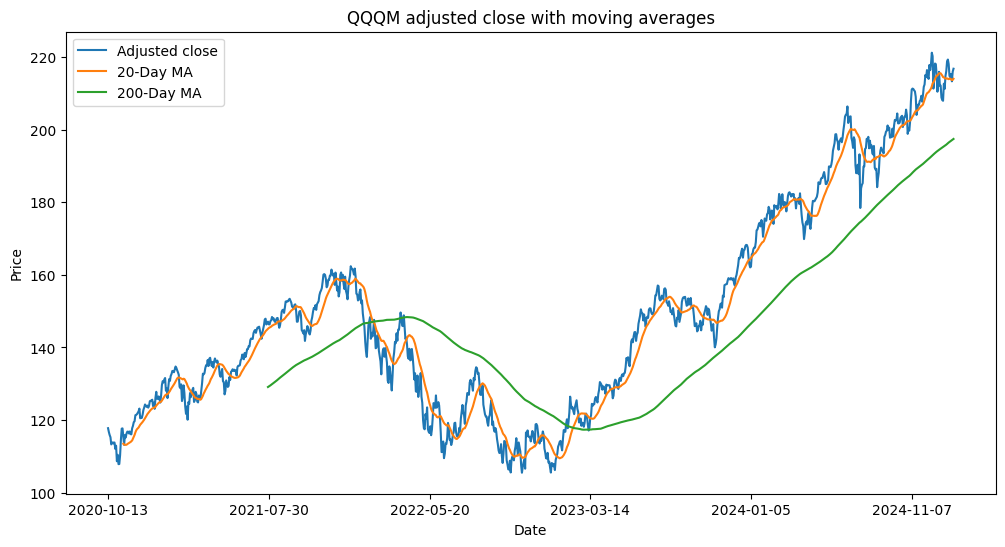

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_sample.index, df_sample["Adj Close"], label="Adjusted close")
plt.plot(df_sample.index, df_sample["SMA_short"], label='20-Day MA')
plt.plot(df_sample.index, df_sample["SMA_long"], label='200-Day MA')
plt.title(f"{etf_key} adjusted close with moving averages")
plt.xlabel("Date")
plt.ylabel("Price")
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(7))
plt.legend()
plt.show()

# Identify golden/death crosses

In [10]:
# Identify when a flip happens
shortGtLong = pricesMA["SMA_short"] > pricesMA["SMA_long"]

prev = shortGtLong.groupby(pricesMA["ETF"], sort=False).shift(1, fill_value=False)

# Categorise flips
pricesMA["BullishFlip"] = (shortGtLong & ~prev).astype("boolean")
pricesMA["BearishFlip"] = (~shortGtLong & prev).astype("boolean")
pricesMA

,ETF,Adj Close,Volume,SMA_short,SMA_long,BullishFlip,BearishFlip
Date,,,,,,,
1962-01-02,AEP,0.932571,5800.0,NaN,NaN,False,False
1962-01-02,BA,0.190931,352350.0,NaN,NaN,False,False
1962-01-02,CNP,0.292567,13879.0,NaN,NaN,False,False
1962-01-02,CVX,0.325399,105840.0,NaN,NaN,False,False
1962-01-02,DTE,0.402760,1880.0,NaN,NaN,False,False
...,...,...,...,...,...,...,...
2025-02-05,ZURA,1.789200,221005.0,1.89071,3.584471,False,False
2025-02-05,ZVRA,8.190000,319404.0,8.12050,6.475275,False,False
2025-02-05,ZYBT,4.280000,11691.0,NaN,NaN,False,False


In [11]:
volWindow = 20
volFactor = 1.2
volMa = (pricesMA.groupby("ETF", sort=False)["Volume"].rolling(volWindow, min_periods=volWindow).mean().reset_index(level=0, drop=True).to_numpy())

pricesMA["volMa"] = volMa

# Mark busy trading sessions
pricesMA["busyDay"] = (pricesMA["Volume"] >= volFactor * pricesMA["volMa"]).astype("boolean")

# Identify wheather the flip is just noise or actually meaningful 
pricesMA["BullishFlip"] = (pricesMA["BullishFlip"] & pricesMA["busyDay"]).astype("boolean")
pricesMA["BearishFlip"] = (pricesMA["BearishFlip"] & pricesMA["busyDay"]).astype("boolean")
pricesMA

,ETF,Adj Close,Volume,SMA_short,SMA_long,BullishFlip,BearishFlip,volMa,busyDay
Date,,,,,,,,,
1962-01-02,AEP,0.932571,5800.0,NaN,NaN,False,False,NaN,False
1962-01-02,BA,0.190931,352350.0,NaN,NaN,False,False,NaN,False
1962-01-02,CNP,0.292567,13879.0,NaN,NaN,False,False,NaN,False
1962-01-02,CVX,0.325399,105840.0,NaN,NaN,False,False,NaN,False
1962-01-02,DTE,0.402760,1880.0,NaN,NaN,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...
2025-02-05,ZURA,1.789200,221005.0,1.89071,3.584471,False,False,NaN,False
2025-02-05,ZVRA,8.190000,319404.0,8.12050,6.475275,False,False,NaN,False
2025-02-05,ZYBT,4.280000,11691.0,NaN,NaN,False,False,NaN,False


In [12]:
# Counting frequency of bullish/bearish + total flips
flipCounts = (pricesMA.groupby("ETF")[["BullishFlip", "BearishFlip"]].sum(numeric_only=True))

In [13]:
flipCounts["TotalFlip"] = (flipCounts["BullishFlip"] + flipCounts["BearishFlip"])
topBullish = (flipCounts.sort_values("BullishFlip", ascending=False).head())
topBearish = (flipCounts.sort_values("BearishFlip", ascending=False).head())

In [14]:
print("ETFs with MOST bullish (golden-cross) flips")
display(topBullish)
print("\nETFs with MOST bearish (death-cross) flips")
display(topBearish)

ETFs with MOST bullish (golden-cross) flips


,BullishFlip,BearishFlip,TotalFlip
ETF,,,
HPQ,54,58,112
CVX,53,45,98
IBM,52,47,99
CL,51,53,104
MO,50,50,100



ETFs with MOST bearish (death-cross) flips


,BullishFlip,BearishFlip,TotalFlip
ETF,,,
HPQ,54,58,112
CL,51,53,104
MO,50,50,100
MCD,46,49,95
KO,44,47,91


# Flip analysis

In [15]:
pricesMA = pricesMA.sort_values(["ETF", "Date"]).copy()

days = 63

# Looks k trading days ahead within each ETF
pricesMA[f"price_fwd_{days}"] = (pricesMA.groupby("ETF", sort=False)["Adj Close"].shift(-days))

# Calculating simple forward return: (future / today) – 1
pricesMA[f"ret_fwd_{days}"] = pricesMA[f"price_fwd_{days}"] / pricesMA["Adj Close"] - 1.0

In [16]:
# Filter out flip rows
flip_mask = pricesMA["BullishFlip"] | pricesMA["BearishFlip"]
flips = pricesMA.loc[flip_mask].copy()
flips["event"] = np.where(flips["BullishFlip"], "Bullish", "Bearish")
flips

,ETF,Adj Close,Volume,SMA_short,SMA_long,BullishFlip,BearishFlip,volMa,busyDay,price_fwd_63,ret_fwd_63,event
Date,,,,,,,,,,,,
2002-01-10,A,19.112549,1730864.0,17.929165,17.850804,True,False,642685.00,True,19.492153,0.019862,Bullish
2002-02-07,A,15.901013,2612443.0,17.495939,17.599907,False,True,1925.00,True,17.148275,0.078439,Bearish
2002-03-05,A,21.028629,4811636.0,17.345604,17.197622,True,False,201234.45,True,14.840549,-0.294269,Bullish
2003-05-09,A,9.839470,2018432.0,9.380032,9.299594,True,False,2595.00,True,12.466542,0.266993,Bullish
2004-05-14,A,15.418980,3197925.0,16.596648,16.736829,False,True,100680.00,True,13.346251,-0.134427,Bearish
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-23,ZYME,10.380000,672700.0,9.320000,9.312575,True,False,715.00,True,12.920000,0.244701,Bullish
2005-06-17,ZYXI,0.180996,68310.0,0.156047,0.155681,True,False,44220.00,True,0.366883,1.027024,Bullish
2022-10-26,ZYXI,9.150000,70500.0,9.084000,9.089876,False,True,21.65,True,12.700000,0.387978,Bearish


In [19]:
col = f"ret_fwd_{days}"
summary = (flips.groupby(["ETF", "event"])[col].agg(
          Count        = "count",
          MeanReturn   = "mean",
          MedianReturn = "median",
          Positives    = lambda s: (s > 0).sum())
      .assign(Percent_Positive = lambda t: t["Positives"] / t["Count"])
      .drop(columns="Positives")
      .sort_values(["event", "MeanReturn"], ascending=[True, False]))

In [20]:
print(f"==={days}-day performance after a *qualified* flip ===")
summary = summary[summary['Count'] > 0]
display(summary.sort_values(["Count","MeanReturn"], ascending=False))

===63-day performance after a *qualified* flip ===


Count  MeanReturn  MedianReturn  Percent_Positive
ETF  event                                                     
HPQ  Bearish     57    0.049010      0.041926          0.561404
     Bullish     54    0.039645      0.038013          0.574074
CL   Bearish     52    0.033066      0.035683          0.634615
IBM  Bullish     52    0.020038      0.016792          0.557692
CVX  Bullish     52    0.000498     -0.007356          0.480769
...             ...         ...           ...               ...
PBM  Bearish      1   -0.929485     -0.929485          0.000000
EJH  Bullish      1   -0.942118     -0.942118          0.000000
HPH  Bearish      1   -0.954261     -0.954261          0.000000
AIEV Bearish      1   -0.954897     -0.954897          0.000000
LENZ Bearish      1   -5.708788     -5.708788          0.000000

[8308 rows x 4 columns]

# Regime shading

In [21]:
# Filter dataframe
dfFull = pricesMA.copy().reset_index()
etfKey = "SPY"
df = dfFull[dfFull["ETF"] == etfKey].copy()

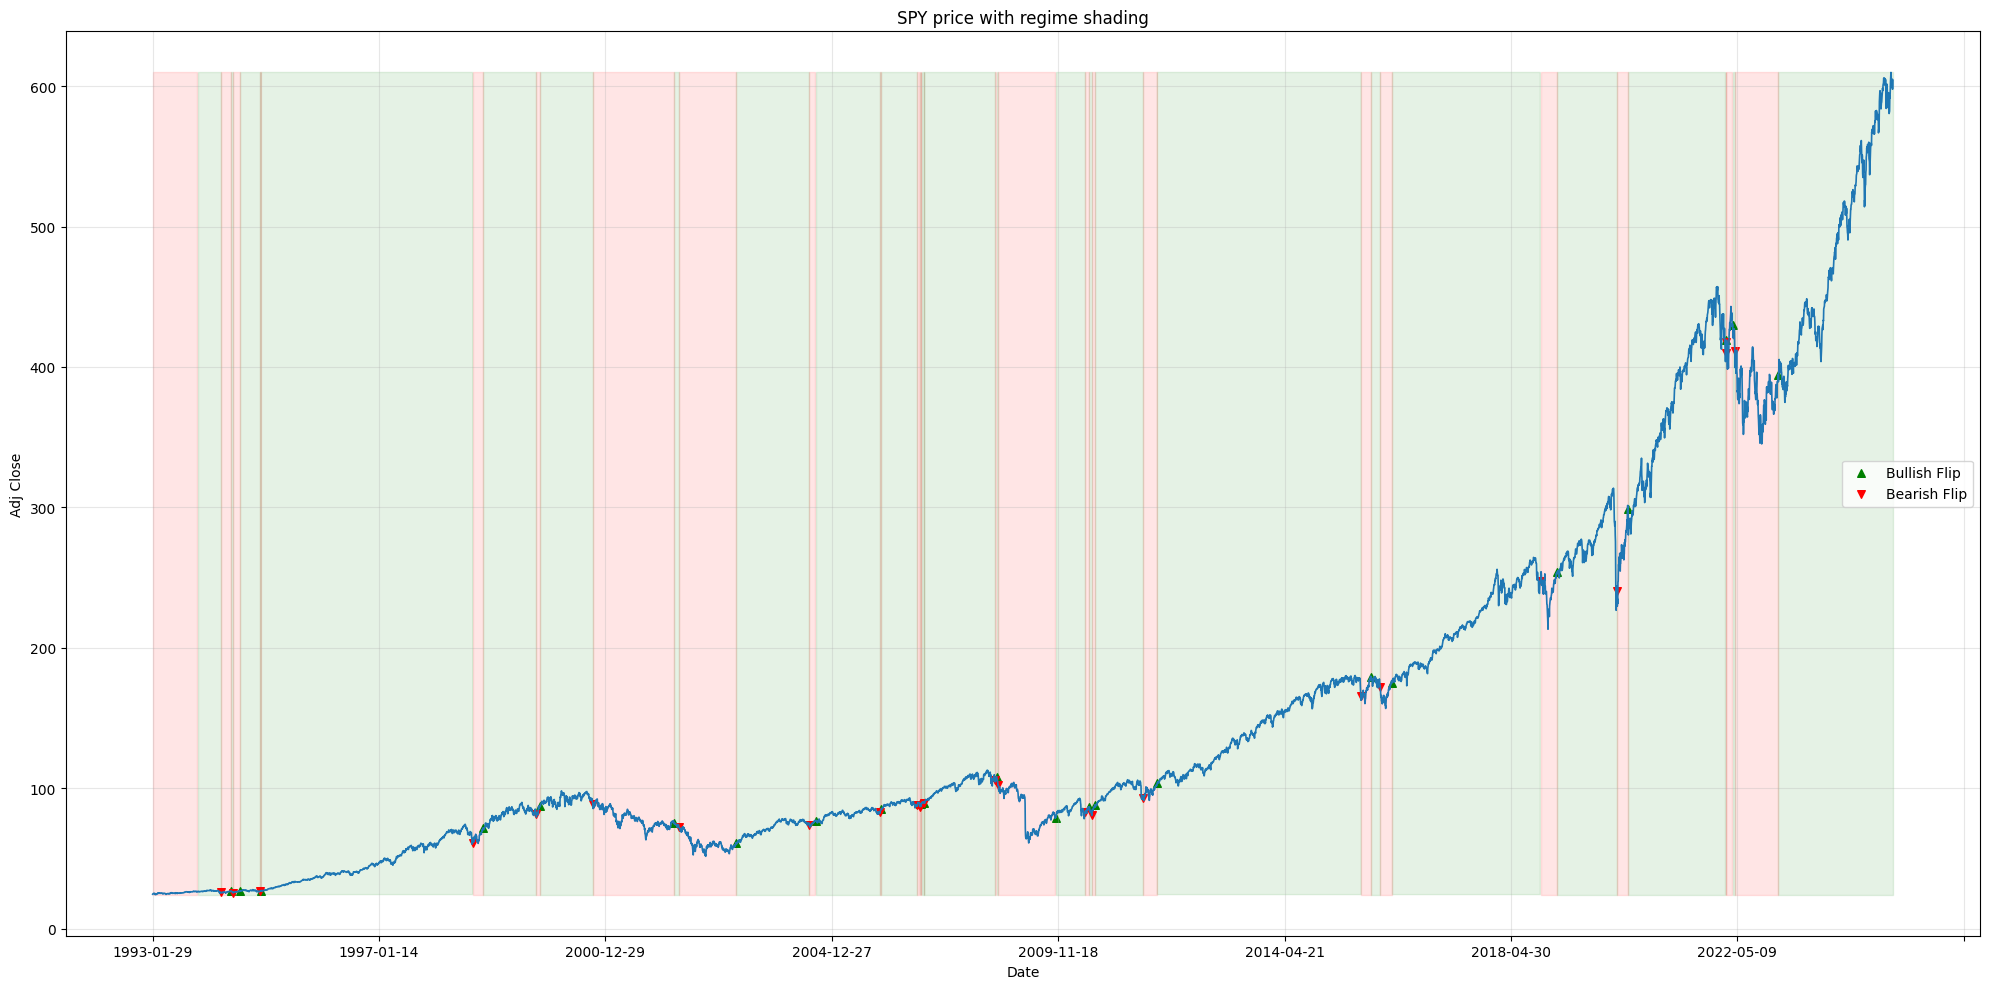

In [22]:
trendUp = df["SMA_short"] > df["SMA_long"]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Price line
ax.plot(df["Date"], df["Adj Close"], linewidth=1.2)

# Regime shading
ax.fill_between(df["Date"], df["Adj Close"].min(), df["Adj Close"].max(),
                where=trendUp, alpha=0.1, color="green")
ax.fill_between(df["Date"], df["Adj Close"].min(), df["Adj Close"].max(),
                where=~trendUp, alpha=0.1, color="red")

# Mark flip days (arrows)
if "BullishFlip" in df.columns and "BearishFlip" in df.columns:
    ax.scatter(df.loc[df["BullishFlip"], "Date"], df.loc[df["BullishFlip"], "Adj Close"], marker="^", color="green", s=30, label="Bullish Flip")
    ax.scatter(df.loc[df["BearishFlip"], "Date"], df.loc[df["BearishFlip"], "Adj Close"], marker="v", color="red", s=30, label="Bearish Flip")

# Plot
ax.set_title(f"{etfKey} price with regime shading")
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(10))
plt.show()